In [6]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [588]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.head()
summary = summary.rename(columns={"tucaseid": "id", "TUFINLWGT": "weight", "TEAGE": "age", "TESEX": "sex", "TELFS": "working_status", "TRYHHCHILD": "age_y_child", "TRCHILDNUM": "num_children"})
summary.columns[10:20]
summary_2003 = pd.read_csv("atusdata/atussum_2003.dat")

In [64]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['weight', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

def average_minutes_alt(data, activity_code):
    activity_col = "{}".format(activity_code)
    data = data[['weight', activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [11]:
# avg. minutes spent writing for personal enjoyment
average_minutes(summary, "120313")

0.24096419699939733

In [12]:
#tools
#to_frame()

In [13]:
#People who reported writing for personal enjoyment
writers = summary[summary.t120313 > 0]

In [14]:
#for people who wrote - average minutes doing so
average_minutes(writers, "120313")
#wow, very high

129.55103142238858

In [15]:
#how many people out of total is this?
a = len(writers)
b = len(summary)
c = len(writers) / len(summary) * 100
print("{} people out of {} reported writing. That's {}%.".format(a, b, c))

25 people out of 11385 reported writing. That's 0.21958717610891526%.


In [16]:
hunting_time = average_minutes(summary, "130118")
hunters = summary[summary.t130118 > 0]
a = len(hunters)
b = len(summary)
c = len(hunters) / len(summary) * 100
print("{} people out of {} reported writing. That's {}%.".format(a, b, c))

29 people out of 11385 reported writing. That's 0.25472112428634164%.


In [17]:
# hunters vs. people writing for personal enjoyment

In [388]:
# average age 
print("Avg. hunter age: {}".format(hunters.age.mean().round(1)))
print("Avg. writer age: {}".format(writers.age.mean().round(1)))

Avg. hunter age: 39.9
Avg. writer age: 54.1


In [19]:
# count gender hunters
print(len(hunters[hunters.sex == 1]))
print(len(hunters[hunters.sex == 2]))

26
3


In [20]:
# count gender writers
print(len(writers[writers.sex == 1]))
print(len(writers[writers.sex == 2]))

11
14


In [21]:
total_average_mins_trad_workout = average_minutes(summary, 130101) + average_minutes(summary, 130104) + average_minutes(summary, 130124) + average_minutes(summary, 130128) + average_minutes(summary, 130131) + average_minutes(summary, 130133) + average_minutes(summary, 130136) + average_minutes(summary, 130134)
aeroobics_avg_mins = average_minutes(summary, 130101)
biking_avg_mins = average_minutes(summary, 130104) 
running_avg_mins = average_minutes(summary, 130124)
cardio_equip_avg_mins = average_minutes(summary, 130128)
walking_avg_mins = average_minutes(summary, 130131)
lifting_avg_mins = average_minutes(summary, 130133)
yoga_avg_mins = average_minutes(summary, 130136)
non_specified_avg_mins = average_minutes(summary, 130134)


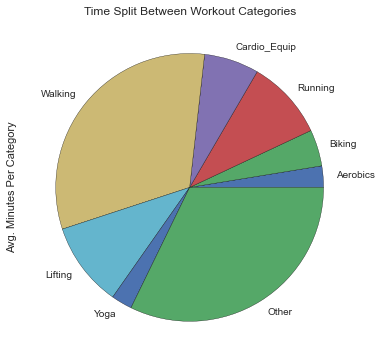

In [22]:
# pie chart of different workout categories
series = pd.Series([aeroobics_avg_mins, biking_avg_mins, running_avg_mins, cardio_equip_avg_mins, walking_avg_mins, lifting_avg_mins, yoga_avg_mins, non_specified_avg_mins], index=['Aerobics', 'Biking', 'Running', 'Cardio_Equip', 'Walking', 'Lifting', 'Yoga', 'Other'], name='Avg. Minutes Per Category')
series.plot(kind='pie', figsize=(6, 6)).set_title('Time Split Between Workout Categories')


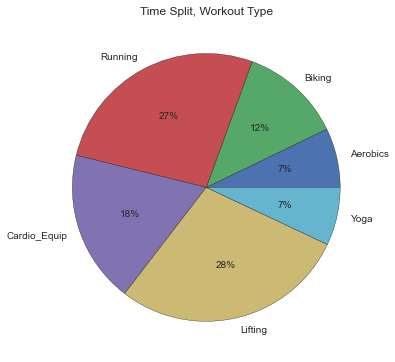

In [23]:
series = pd.Series([aeroobics_avg_mins, biking_avg_mins, running_avg_mins, cardio_equip_avg_mins, lifting_avg_mins, yoga_avg_mins], index=['Aerobics', 'Biking', 'Running', 'Cardio_Equip', 'Lifting', 'Yoga'], name='')
series.plot(kind='pie', figsize=(6, 6), autopct='%1.f%%').set_title('Time Split, Workout Type')


In [24]:
males = summary[summary.sex == 1]
females = summary[summary.sex == 2]

In [25]:
# men and women split in workout type

aeroobics_males = average_minutes(males, 130101)
biking_males = average_minutes(males, 130104) 
running_males = average_minutes(males, 130124)
cardio_equip_males = average_minutes(males, 130128)
walking_males = average_minutes(males, 130131)
lifting_males = average_minutes(males, 130133)
yoga_males = average_minutes(males, 130136)
non_specified_males = average_minutes(males, 130134)

aeroobics_females = average_minutes(females, 130101)
biking_females = average_minutes(females, 130104) 
running_females = average_minutes(females, 130124)
cardio_equip_females = average_minutes(females, 130128)
walking_females = average_minutes(females, 130131)
lifting_females = average_minutes(females, 130133)
yoga_females = average_minutes(females, 130136)
non_specified_females = average_minutes(females, 130134)



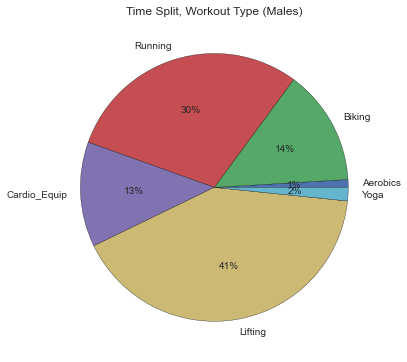

In [26]:
series = pd.Series([aeroobics_males, biking_males, running_males, cardio_equip_males, lifting_males, yoga_males], index=['Aerobics', 'Biking', 'Running', 'Cardio_Equip', 'Lifting', 'Yoga'], name='')
series.plot(kind='pie', figsize=(6, 6), autopct='%1.f%%').set_title('Time Split, Workout Type (Males)')

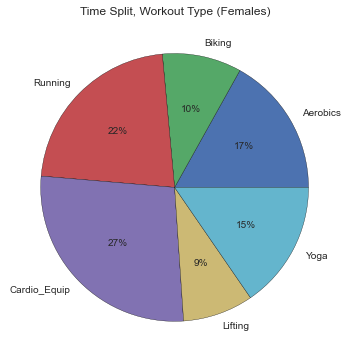

In [27]:
series = pd.Series([aeroobics_females, biking_females, running_females, 
                    cardio_equip_females, lifting_females, 
                    yoga_females], index=['Aerobics', 'Biking', 'Running', 
                                          'Cardio_Equip', 'Lifting', 'Yoga'], name='')

series.plot(kind='pie', figsize=(6, 6), autopct='%1.f%%').set_title('Time Split, Workout Type (Females)')

In [28]:
#Time spent working out males vs. females
average_mins_working_out_males = average_minutes(males, 130101) + average_minutes(males, 130104) + average_minutes(males, 130124) + average_minutes(males, 130128) + average_minutes(males, 130131) + average_minutes(males, 130133) + average_minutes(males, 130136) + average_minutes(males, 130134)
average_mins_working_out_females = average_minutes(females, 130101) + average_minutes(females, 130104) + average_minutes(females, 130124) + average_minutes(females, 130128) + average_minutes(females, 130131) + average_minutes(females, 130133) + average_minutes(females, 130136) + average_minutes(females, 130134)

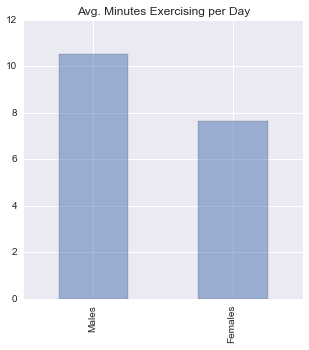

In [381]:
males_females = pd.Series([average_mins_working_out_males, average_mins_working_out_females], index = ['Males', 'Females'])
males_females.plot(kind='bar', figsize=(5, 5), alpha=0.5).set_title('Avg. Minutes Exercising per Day')


Age Demographics

In [31]:
#Creating age groups
workout_types = [130101, 130104, 130124, 130128, 130131, 130133, 130136, 130134]

for start, stop in [(14,17), (18,23), (24,30), (31,40), (41,50), (51,60), (60,100)]:
    males_start_stop = males[(males.age >= start) & (males.age <= stop)]

alist = []
for x in workout_types:
    average_mins_males_14_17 = average_minutes(males_14_17, x)
alist.append(average_mins_males_14_17)
sum(alist)
    
for start, stop in [(14,17), (18,23), (24,30), (31,40), (41,50), (51,60), (60,100)]:
    females_start_stop = females[(females.age >= start) & (females.age <= stop)]

[]

In [33]:
#age_group_list = []

#for start, stop in [(14,17), (18,23), (24,30), (31,40), (41,50), (51,60), (60,100)]:
       #age_group_list.append(males[(males.age >= start) & (males.age <= stop)])

In [34]:
male_age_group_list = [males[(males.age >= start) & (males.age <= stop)] 
                    for start, stop in [(14,17), (18,23), (24,30), (31,40), (41,50), (51,60), (60,100)]]

female_age_group_list = [females[(females.age >= start) & (females.age <= stop)] 
                    for start, stop in [(14,17), (18,23), (24,30), (31,40), (41,50), (51,60), (60,100)]]


In [35]:
m_avg_workout_time_14_17 = sum([average_minutes(male_age_group_list[0], x) for x in workout_types])
m_avg_workout_time_18_23 = sum([average_minutes(male_age_group_list[1], x) for x in workout_types])
m_avg_workout_time_24_30 = sum([average_minutes(male_age_group_list[2], x) for x in workout_types])
m_avg_workout_time_31_40 = sum([average_minutes(male_age_group_list[3], x) for x in workout_types])
m_avg_workout_time_41_50 = sum([average_minutes(male_age_group_list[4], x) for x in workout_types])
m_avg_workout_time_51_60 = sum([average_minutes(male_age_group_list[5], x) for x in workout_types])
m_avg_workout_time_61up = sum([average_minutes(male_age_group_list[5], x) for x in workout_types])

males_avg_workout_time_list = [m_avg_workout_time_14_17, 
                               m_avg_workout_time_18_23, 
                               m_avg_workout_time_24_30,
                               m_avg_workout_time_31_40,
                               m_avg_workout_time_41_50,
                               m_avg_workout_time_51_60,
                               m_avg_workout_time_61up]

f_avg_workout_time_14_17 = sum([average_minutes(female_age_group_list[0], x) for x in workout_types])
f_avg_workout_time_18_23 = sum([average_minutes(female_age_group_list[1], x) for x in workout_types])
f_avg_workout_time_24_30 = sum([average_minutes(female_age_group_list[2], x) for x in workout_types])
f_avg_workout_time_31_40 = sum([average_minutes(female_age_group_list[3], x) for x in workout_types])
f_avg_workout_time_41_50 = sum([average_minutes(female_age_group_list[4], x) for x in workout_types])
f_avg_workout_time_51_60 = sum([average_minutes(female_age_group_list[5], x) for x in workout_types])
f_avg_workout_time_61up = sum([average_minutes(female_age_group_list[5], x) for x in workout_types])

females_avg_workout_time_list = [f_avg_workout_time_14_17, 
                               f_avg_workout_time_18_23, 
                               f_avg_workout_time_24_30,
                               f_avg_workout_time_31_40,
                               f_avg_workout_time_41_50,
                               f_avg_workout_time_51_60,
                               f_avg_workout_time_61up]

age_list = ["14_17", "18_23", "24_30", "31_40", "41_50", "51_60", "61_up"]
f_age_list = ["F_14_17", "F_18_23", "F_24_30", "F_31_40", "F_41_50", "F_51_60", "F_61up"]


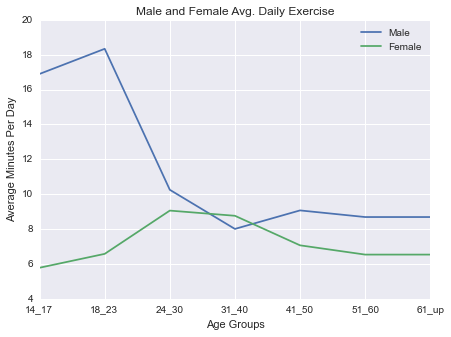

In [390]:
females_avg_workout_time = pd.Series(females_avg_workout_time_list, index = age_list)
males_avg_workout_time = pd.Series(males_avg_workout_time_list, index = age_list)
#use group_by to plot
males_avg_workout_time.plot()
x = females_avg_workout_time.plot(figsize=(7,5))
x.set_xlabel("Age Groups")
x.set_ylabel("Average Minutes Per Day")
x.set_title("Male and Female Avg. Daily Exercise")
x.legend(["Male", "Female"], loc=1)
plt.show(x)


In [44]:
summary = summary.rename(columns={"t130101": "aerobics", "t130104": "biking", 
                          "t130124": "running", "t130128": "cardio_equip", 
                          "t130131": "walking", "t130133": "lifting", 
                          "t130136": "yoga", "t130134": "other"})

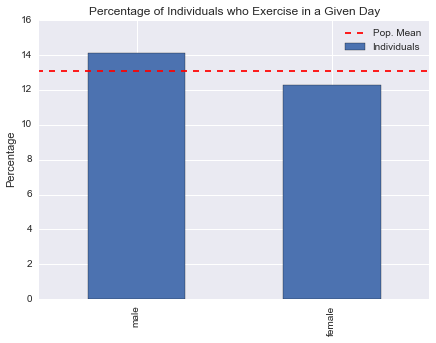

In [48]:
summary["total_exercise"] = (summary.aerobics + summary.biking + summary.running + 
                               summary.running + summary.cardio_equip + summary.walking +
                               summary.lifting + summary.yoga + summary.other)

# Percentage of women/men who exercised in given day

a = len(summary[summary.total_exercise > 0]) / len(summary) * 100

males = summary[summary.sex == 1]
females = summary[summary.sex == 2]

b = len(males[males.total_exercise > 0]) / len(males) * 100
c = len(females[females.total_exercise > 0]) / len(females) * 100

ab = pd.DataFrame(data = [b,c], index = ["male", "female"])
graph = ab.plot(kind="bar", figsize = (7,5))
graph.hlines(a, -1, 2, color="red", linestyle="dashed")
graph.legend(["Pop. Mean", "Individuals"], loc=1)
graph.set_title('Percentage of Individuals who Exercise in a Given Day')
graph.set_ylabel("Percentage")

In [336]:
#average time exercising for those who did
avg_exercise_time = average_minutes_alt(summary_exercised, "total_exercise")
avg_exercise_time = avg_exercise_time / 60

# average time watching TV for people who worked out vs. people who didn't
summary_no_exercise = summary[summary.total_exercise == 0]
TV_time_no_exercise = average_minutes(summary_no_exercise, 120303)
TV_time_no_exercise = TV_time_no_exercise / 60

#average time watching TV for people who did work out
summary_exercised = summary[summary.total_exercise > 0]
TV_time_exercised = average_minutes(summary_exercised, 120303)
TV_time_exercised = TV_time_exercised / 60

#average time sleeping no exercise
sleep_no_exercise = average_minutes(summary_no_exercise, "010101") 
sleep_no_exercise = sleep_no_exercise / 60

# average time sleeping exercise
sleep_exercise = average_minutes(summary_exercised, "010101") 
sleep_exercise = sleep_exercise / 60

#sleepnessness and no exercise
sleeplessness_no_exercise = average_minutes(summary_no_exercise, "010102") 

#sleepnessness and exercise
sleeplessness_exercise = average_minutes(summary_exercised, "010102") 

#working and exercise
# age over 23
summary_exercised_working_age = summary_exercised[(summary_exercised.age > 23) 
                                                  & (summary_exercised.age < 65)]
work_exercise = average_minutes(summary_exercised_working_age, "050101")
work_exercise = work_exercise / 60

#working and no exercise
summary_no_exercise_working_age = summary_no_exercise[(summary_no_exercise.age > 23) 
                                                  & (summary_no_exercise.age < 65)]
work_no_exercise = average_minutes(summary_no_exercise_working_age, "050101")
work_no_exercise = work_no_exercise / 60

In [337]:
sleep_data = {"Exercise": sleep_exercise, "No_Exercise": sleep_no_exercise}
TV_data = {"Exercise": TV_time_exercised, "No_Exercise": TV_time_no_exercise}
sleeplessness_data = {"Exercise": sleeplessness_exercise, "No_Exercise": sleeplessness_no_exercise}
work_data = {"Exercise": work_exercise, "No_Exercise": work_no_exercise}

data1 = pd.DataFrame([sleep_data, TV_data, work_data], index=["Sleep", "TV", "Work"])
(data1 * 60).round() 

,Exercise,No_Exercise
Sleep,508,523
TV,147,169
Work,234,238


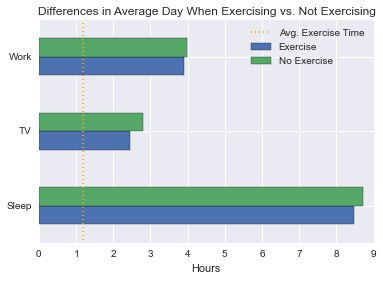

In [355]:
x = data1.plot(kind="barh")
x.set_xlabel("Hours")
x.vlines(avg_exercise_time, -1, 9, color="orange", linestyle = "dotted")
x.legend(["Avg. Exercise Time", "Exercise", "No Exercise"])
x.set_title("Differences in Average Day When Exercising vs. Not Exercising")

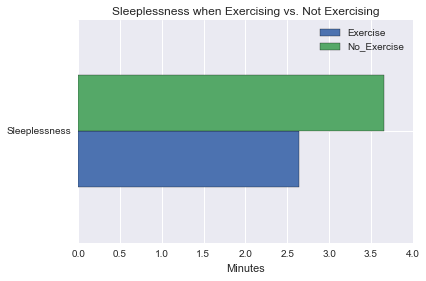

In [356]:
x = data_sleeplessness.plot(kind="barh")
x.set_xlabel("Minutes")
x.set_title("Sleeplessness when Exercising vs. Not Exercising")

In [377]:
tv_exercise_rel = summary_exercised[["total_exercise", "t120303"]]
tv_exercise_rel = tv_exercise_rel.rename(columns={"t120303": "TV"})
tv_exercise_rel = tv_exercise_rel[tv_exercise_rel.total_exercise < 300]
tv_exercise_rel = tv_exercise_rel[tv_exercise_rel.TV < 300]
tv_exercise_rel = tv_exercise_rel[tv_exercise_rel.TV > 0]

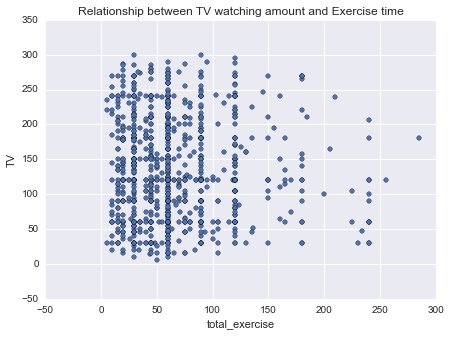

In [384]:
x = tv_exercise_rel.plot(kind="scatter", x="total_exercise", y="TV", figsize=(7,5))
x.set_title("Relationship between TV watching amount and Exercise time")

No relationship seen here between time spent watching TV and time spent exercising

In [405]:
# who listens to the radio?

In [514]:
radio_listeners = summary[(summary.t120305 > 0)]
radio_listeners = radio_listeners[(radio_listeners.t120306 == 0)]

non_radio_listeners = summary[(summary.t120306 > 0)]
non_radio_listeners = non_radio_listeners[(non_radio_listeners.t120305 == 0)]

non_listeners = summary[(summary.t120306 == 0)]
non_listeners = non_listeners[(non_listeners.t120305 == 0)]

In [558]:
radio_age = radio_listeners.age.mean()
avg_age = summary.age.mean()
non_radio_age = non_radio_listeners.age.mean()

radio_gender = (len(radio_listeners[(radio_listeners.sex == 1)]) / len(radio_listeners)) *100
non_radio_gender = (len(non_radio_listeners[(non_radio_listeners.sex == 1)]) / len(non_radio_listeners)) * 100 
avg_gender = (len(summary[(summary.sex == 1)]) / len(summary)) * 100

In [521]:
radio_data = {"age": radio_age}
non_radio_data = {"age": non_radio_age}
avg_data = {"age": avg_age}


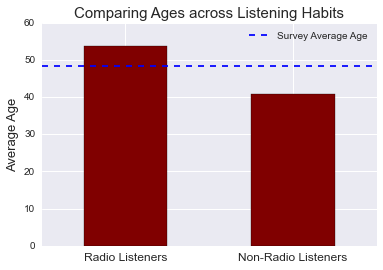

In [535]:
x = pd.DataFrame(data = [radio_age, non_radio_age], index=["Radio Listeners", "Non-Radio Listeners"])
graph = x.plot(kind="bar", color="maroon", legend=False)
graph.set_xticklabels(["Radio Listeners", "Non-Radio Listeners"], rotation=0, size=12)
graph.set_ylabel("Average Age", size=13)
graph.set_title("Comparing Ages across Listening Habits", size=15)
graph.hlines(avg_age, -1, 2, color="blue", linestyle="dashed")
graph.legend(["Survey Average Age"], loc=1)

Radio listeners are on average older than the population mean while non-radio listeners (individuals who listen to other sources of music like CDs or online music and not radio) are on average much younger.

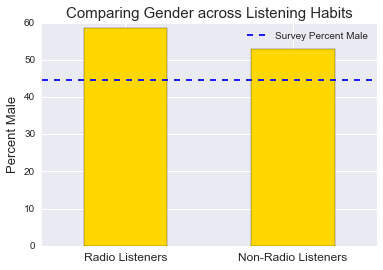

In [562]:
y = pd.DataFrame(data = [radio_gender, non_radio_gender], index=["Radio Listeners", "Non-Radio Listeners"])
graph = y.plot(kind="bar", color="gold", legend=False)
graph.set_xticklabels(["Radio Listeners", "Non-Radio Listeners"], rotation=0, size=12)
graph.set_ylabel("Percent Male", size=13)
graph.set_title("Comparing Gender across Listening Habits", size=15)
graph.hlines(avg_gender, -1, 2, color="blue", linestyle="dashed")
graph.legend(["Survey Percent Male"], loc=1)


In [570]:
radio_travel_rel = summary[["t120305", "t180501"]]
radio_travel_rel = radio_travel_rel.rename(columns={"t120305": "Radio", "t180501": "Work_Travel"})
radio_travel_rel = radio_travel_rel[radio_travel_rel.Radio > 0]
radio_travel_rel = radio_travel_rel[radio_travel_rel.Radio < 200]
radio_travel_rel = radio_travel_rel[radio_travel_rel.Work_Travel < 100]
radio_travel_rel = radio_travel_rel[radio_travel_rel.Work_Travel > 0]

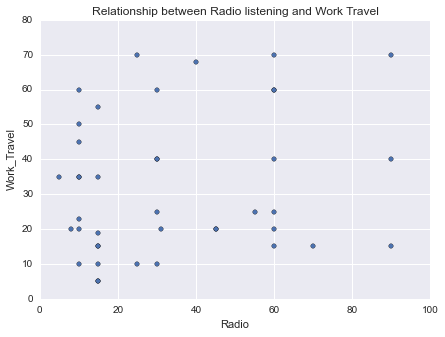

In [571]:
y = radio_travel_rel.plot(kind="scatter", x="Radio", y="Work_Travel", figsize=(7,5))
y.set_title("Relationship between Radio listening and Work Travel")

No relationship to be seen

In [581]:
radio_travel_rel = summary[["t120306", "t120308"]]
radio_travel_rel = radio_travel_rel.rename(columns={"t120306": "Non_Radio_listening", "t120308": "Leisure_Computer_Use"})
radio_travel_rel = radio_travel_rel[radio_travel_rel.Non_Radio_listening > 0]
radio_travel_rel = radio_travel_rel[radio_travel_rel.Non_Radio_listening < 200]
radio_travel_rel = radio_travel_rel[radio_travel_rel.Leisure_Computer_Use < 100]
radio_travel_rel = radio_travel_rel[radio_travel_rel.Leisure_Computer_Use > 0]

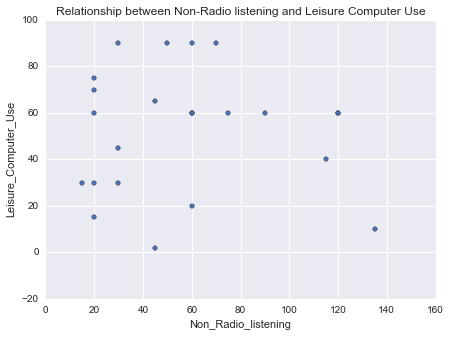

In [583]:
y = radio_travel_rel.plot(kind="scatter", x="Non_Radio_listening", y="Leisure_Computer_Use", figsize=(7,5))
y.set_title("Relationship between Non-Radio listening and Leisure Computer Use")